In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('data/softmax.txt', sep=' ', header=None)
df

,0,1,2,3,4
0,2,1,0,0,1
1,3,2,0,0,1
2,3,4,0,0,1
3,5,5,0,1,0
4,7,5,0,1,0
5,2,5,0,1,0
6,6,6,1,0,0
7,7,7,1,0,0


In [3]:
x_data = df.iloc[:, :2].values
y_data = df.iloc[:, 2:].values

In [4]:
x_data.shape

(8, 2)

In [5]:
# z = tf.matmul( x, w) + b
# hx = tf.nn.soft( z )
dense = Dense( units=3, input_dim=2 ,activation='softmax' )# w: 2x3, b :3
dense( tf.constant( x_data, tf.float32) )

c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<tf.Tensor: shape=(8, 3), dtype=float32, numpy=
array([[0.14198604, 0.7851032 , 0.0729107 ],
       [0.11937841, 0.8341426 , 0.04647892],
       [0.48292676, 0.28142783, 0.23564537],
       [0.2235699 , 0.72041094, 0.05601915],
       [0.0159206 , 0.9822496 , 0.0018298 ],
       [0.5419972 , 0.0208459 , 0.43715692],
       [0.19004506, 0.7738502 , 0.03610476],
       [0.15899225, 0.818106  , 0.02290174]], dtype=float32)>

In [8]:
dense = Dense( units=3, input_dim=2 ,activation='softmax' )
model = Sequential( [dense])
model.compile( loss='categorical_crossentropy', optimizer=Adam(0.1),
              metrics=['acc'] )
h = model.fit( x_data, y_data, epochs=1000)

Epoch 1/1000


c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - acc: 0.3750 - loss: 7.9154
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.3750 - loss: 6.7730
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.3750 - loss: 5.6409
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.3750 - loss: 4.5342
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.3750 - loss: 3.5001
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.6250 - loss: 2.7395
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.3750 - loss: 2.5741
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.3750 - loss: 2.4175
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.3750 - loss: 2.0837
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.3750 - loss: 1.6905
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.3750 - loss: 1.4799
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.2500 - loss: 1.6460
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/st

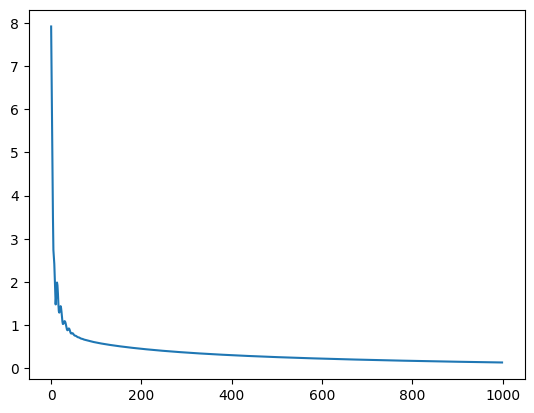

In [9]:
plt.plot( h.history['loss'])
plt.show()

In [10]:
w,b = dense.get_weights()
print( w )
print( b )

[[ 0.40963167  0.3030849   0.0452208 ]
 [ 3.2665164   0.04676683 -3.3574638 ]]
[-16.726856    2.0529199  17.603605 ]


In [12]:
model.predict( np.array( [[1,2]] ) ).argmax( axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([2])

In [14]:
## 2분 퀴즈 2,2   5,6 출석의 학점
model.predict( np.array( [[2,2,],[5,6]]) ).argmax( axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([2, 0])